In [1]:
import torch
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import seaborn as sns

# Q1

In [19]:
def f(x):
    '''
    x: torch.Tensor, x-values for which the function is evaluated
    returns: torch.Tensor, f(x)
    '''
    x = torch.tensor(x)
    return torch.exp(-(x**2)/2)

In [20]:
def getMonteCarloEstimate(a, num_samples=1000):
    '''
    a: float, upper bound of uniform distribution
    num_samples: int, number of samples to draw from uniform distribution

    returns: float, estimate of integral of f from [-inf, inf]
    '''
    dist_mc = torch.distributions.uniform.Uniform(-a, a)
    samples = dist_mc.sample((num_samples,))
    # multiply by 2a to account for the fact that we are sampling from [-a, a] but we need integral from [-inf, inf]
    mc_estimate = 2*a*torch.mean(f(samples))
    return mc_estimate

In [21]:
def find_integral(func, lower_bound, upper_bound):
    '''
    func: function, function to integrate
    lower_bound: float, lower bound of integration
    upper_bound: float, upper bound of integration

    returns: float, integral of func from lower_bound to upper_bound
    '''
    return sp.integrate.quad(func, lower_bound, upper_bound)[0]

#### Q1. i)

In [22]:
# find Monte Carlo estimates for different values of a
num_sample = 1000
a_values = [0.01, 0.02, 0.05, 0.1, 0.5, 1, 2, 3, 5]
mc_estimates = []

for i in range(len(a_values)):
    mc_estimates.append(getMonteCarloEstimate(a_values[i], num_sample))

# analytical normalizing constant
normalization_constant = torch.sqrt(torch.tensor(2*torch.pi))

# save to compare in part c
mc_estimates_part_a = mc_estimates.copy()

C:\Users\ryees\AppData\Local\Temp\ipykernel_18596\3341782372.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


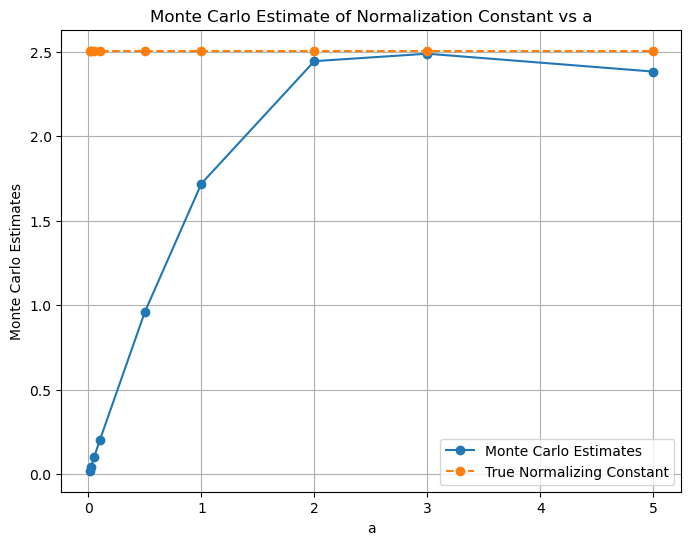

In [23]:
# plot Monte Carlo estimates vs a
plt.figure(figsize=(8, 6))
plt.plot(a_values, mc_estimates, marker='o', label='Monte Carlo Estimates')
plt.plot(a_values, normalization_constant*torch.ones(len(a_values)), marker='o', linestyle='--', label='True Normalizing Constant')
plt.xlabel('a')
plt.ylabel('Monte Carlo Estimates')
plt.title('Monte Carlo Estimate of Normalization Constant vs a')
plt.grid(True)
plt.legend()
plt.show()

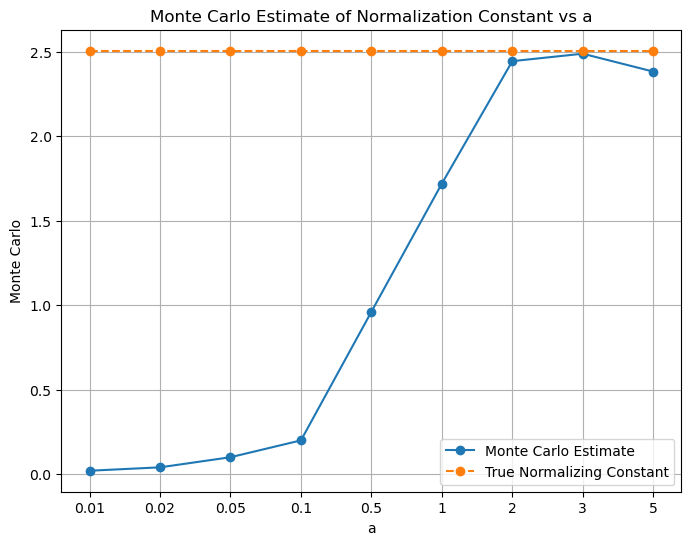

In [24]:
# plot using x-axis labels as a values
x_coordinates = np.arange(len(a_values))
plt.figure(figsize=(8, 6))
plt.xticks(x_coordinates, a_values)  # Set x-axis labels to a_values
plt.plot(x_coordinates, mc_estimates, marker='o', label='Monte Carlo Estimate')
plt.plot(x_coordinates, normalization_constant*torch.ones(len(a_values)), marker='o', label='True Normalizing Constant', linestyle='--')
plt.xlabel('a')
plt.ylabel('Monte Carlo')
plt.title('Monte Carlo Estimate of Normalization Constant vs a')
plt.grid(True)
plt.legend()
plt.show()

#### Q1. ii)

In [25]:
num_samples = [10, 100, 1000, 10000, 100000]
repeat = 10
mc_estimates = np.zeros((len(num_samples), repeat))
a = 4

for i in range(len(num_samples)):
    for j in range(repeat):
        mc_estimates[i, j] = getMonteCarloEstimate(a, num_samples[i])

mean_mc_estimates = np.mean(mc_estimates, axis=1)
std_mc_estimates = np.std(mc_estimates, axis=1)

C:\Users\ryees\AppData\Local\Temp\ipykernel_18596\3341782372.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


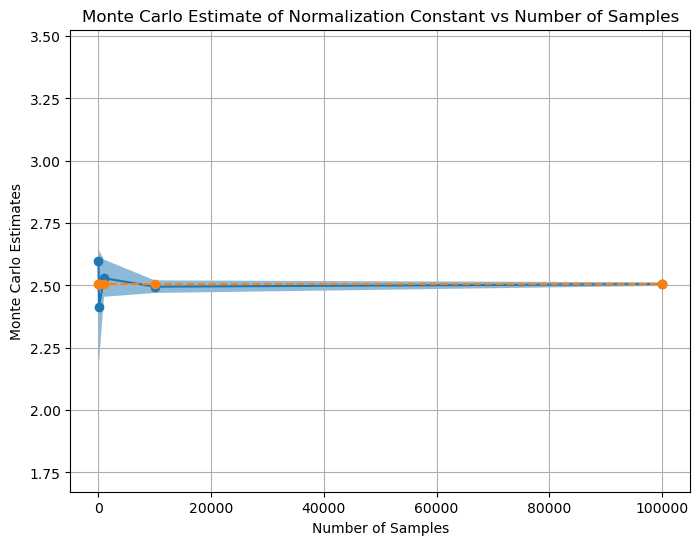

In [26]:
# plot Monte Carlo estimates vs num_samples
plt.figure(figsize=(8, 6))
plt.plot(num_samples, mean_mc_estimates, marker='o')
plt.plot(num_samples, normalization_constant*torch.ones(len(num_samples)), marker='o', linestyle='--', label='True Normalizing Constant')
plt.fill_between(num_samples, mean_mc_estimates-std_mc_estimates, mean_mc_estimates+std_mc_estimates, alpha=0.5, label='Standard Deviation')
plt.xlabel('Number of Samples')
plt.ylabel('Monte Carlo Estimates')
plt.title('Monte Carlo Estimate of Normalization Constant vs Number of Samples')
plt.grid(True)
plt.show()

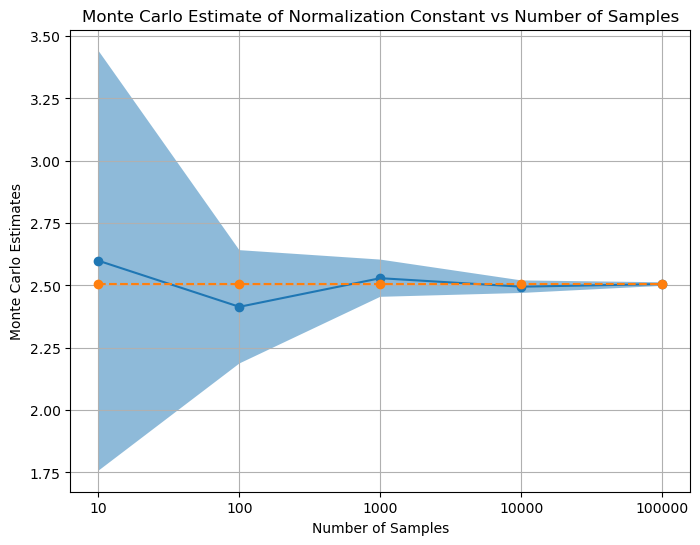

In [27]:
# plot Monte Carlo estimates vs num_samples
x_coordinates = np.arange(len(num_samples))
plt.figure(figsize=(8, 6))
plt.xticks(x_coordinates, num_samples)  # Set x-axis labels to num_samples values
plt.plot(x_coordinates, mean_mc_estimates, marker='o')
plt.plot(x_coordinates, normalization_constant*torch.ones(len(num_samples)), marker='o', linestyle='--', label='True Normalizing Constant')
plt.fill_between(x_coordinates, mean_mc_estimates-std_mc_estimates, mean_mc_estimates+std_mc_estimates, alpha=0.5, label='Standard Deviation')
plt.xlabel('Number of Samples')
plt.ylabel('Monte Carlo Estimates')
plt.title('Monte Carlo Estimate of Normalization Constant vs Number of Samples')
plt.grid(True)
plt.show()

#### Q1. iii)

In [28]:
# find Monte Carlo estimates for different values of a
num_sample = 1000
a_values = [0.01, 0.02, 0.05, 0.1, 0.5, 1, 2, 3, 5]
mc_estimates = []

for i in range(len(a_values)):
    mc_estimates.append(find_integral(func=f, lower_bound=-a_values[i], upper_bound=a_values[i]))

# analytical normalizing constant
normalization_constant = torch.sqrt(torch.tensor(2*torch.pi))

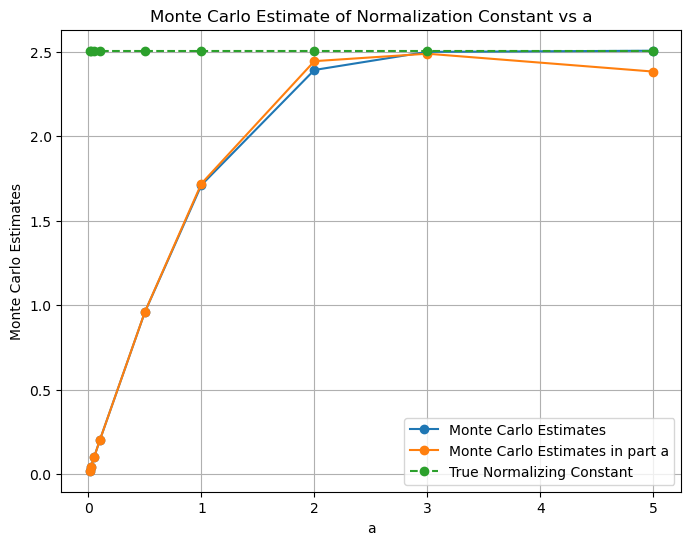

In [29]:
# plot Monte Carlo estimates vs a
plt.figure(figsize=(8, 6))
plt.plot(a_values, mc_estimates, marker='o', label='Monte Carlo Estimates')
plt.plot(a_values, mc_estimates_part_a, marker='o', label='Monte Carlo Estimates in part a')
plt.plot(a_values, normalization_constant*torch.ones(len(a_values)), marker='o', linestyle='--', label='True Normalizing Constant')
plt.xlabel('a')
plt.ylabel('Monte Carlo Estimates')
plt.title('Monte Carlo Estimate of Normalization Constant vs a')
plt.grid(True)
plt.legend()
plt.show()

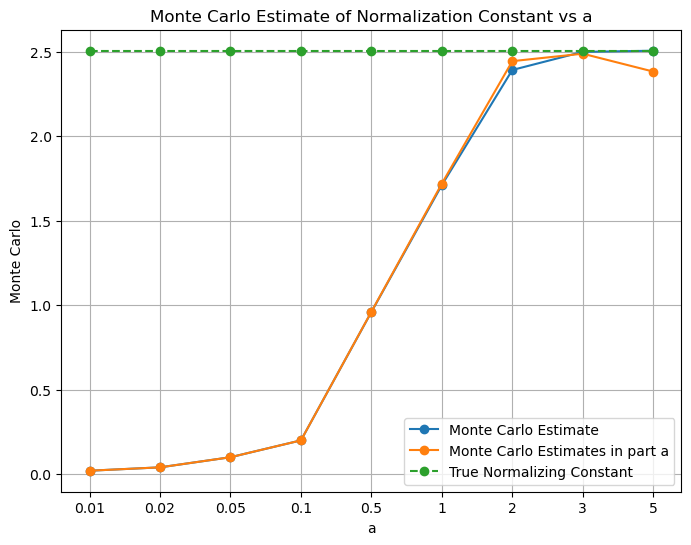

In [30]:
# plot using x-axis labels as a values
x_coordinates = np.arange(len(a_values))
plt.figure(figsize=(8, 6))
plt.xticks(x_coordinates, a_values)  # Set x-axis labels to 'a' values
plt.plot(x_coordinates, mc_estimates, marker='o', label='Monte Carlo Estimate')
plt.plot(x_coordinates, mc_estimates_part_a, marker='o', label='Monte Carlo Estimates in part a')
plt.plot(x_coordinates, normalization_constant*torch.ones(len(a_values)), marker='o', label='True Normalizing Constant', linestyle='--')
plt.xlabel('a')
plt.ylabel('Monte Carlo')
plt.title('Monte Carlo Estimate of Normalization Constant vs a')
plt.grid(True)
plt.legend()
plt.show()

##### Explanation and conclusions:
$$\frac{1}{\sqrt{2\pi}} \int_{-\infty}^{+\infty}  e^{-\frac{x^2}{2}} \, dx = 1$$

Therefore, $$\int_{-\infty}^{+\infty}  e^{-\frac{x^2}{2}} \, dx = \frac{1}{\sqrt{2\pi}}$$


**Q1. i)**
- We observe that as the value of 'a' increases, we get estimated values of the integral closer to the actual value of the integral. However, we may see slight different value than the actual value of the integral for some values of 'a'. Also, the the estimated value of smaller a may be closer to the actual value of the integral than the estimated value of larger a. This is because there is a variance associated with each of the estimated values of the integral. Therefore, it may be possible that the estimated value of the integral for a smaller value of 'a' may be closer to the actual value of the integral than the estimated value of the integral for a larger value of 'a'.
- We have taken: mc_estimate = 2*a*torch.mean(f(samples)). The multiplication of '2a' is done to account for the fact that we are sampling from [-a, a] but we need integral from [-inf, inf]

**Q1. ii)**
- We observe that as the the sample numbers increases, the mean of estimated value of the integral reaches near true value of the integral and variance decreases.

**Q1. iii)**
- We observe that the estimates found using Monte-Carlo sampling and using the scipy.integrate.quad are close. However, the Monte-Carlo sampling method is not as accurate as the scipy.integrate.quad method. This is because the scipy.integrate.quad method uses the actual function to find the integral whereas the Monte-Carlo sampling method uses the estimated function to find the integral.

---

# Q2

#### Q2. i)

Since the cdf of Cauchy distribution, $$y = \frac{1}{\pi} \cdot \arctan(\frac{x-x_0}{\gamma}) + \frac{1}{2}$$ 
where, $x_0$ is the location parameter and $\gamma$ is the scale parameter.

$\implies$ $$\frac{x-x_0}{\gamma} = \tan(\pi (y - \frac{1}{2})) $$

$\implies$ $$ x = x_0 + \gamma \tan(\pi (y - \frac{1}{2})) $$

Here, 
- y = cdf value, 0<=y<=1. We can sample y from uniform distribution.
- x = sample from Cauchy distribution

#### Q2. ii)

In [93]:
def invCDFCauchy(x0, gamma, y):
    '''
    x0: float, location parameter of Cauchy distribution
    gamma: float, scale parameter of Cauchy distribution

    returns: float, inverse CDF evaluated at y
    '''
    return x0 + gamma*torch.tan(torch.pi*(y - 0.5))

In [108]:
num_samples = 1000
x0 = 0
gamma = 1
# torch.manual_seed(42)

# Sample from Cauchy distribution using inverse CDF found analytically
y = torch.distributions.uniform.Uniform(0, 1).sample((num_samples,)) # generate samples from uniform distribution between 0.05 and 0.95
y = y[(0.05<=y) & (y<=0.95)]
samples1 = invCDFCauchy(x0, gamma, y)
print("samples1.shape:", samples1.shape)

# Sample from Cauchy distribution using inverse CDF using torch.distributions.Cauchy(loc=0, scale=1)
dist_Cauchy = torch.distributions.Cauchy(loc=x0, scale=gamma)
x_axis = torch.linspace(-10, 10, 1000)
samples2 = dist_Cauchy.log_prob(x_axis).exp()

samples1.shape: torch.Size([915])


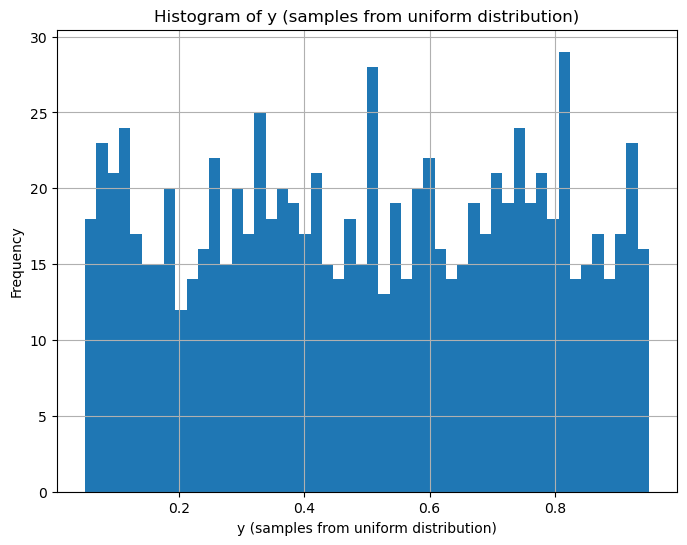

In [109]:
# plot histogram of y (samples from uniform distribution)
plt.figure(figsize=(8, 6))
plt.hist(y, bins=50)
plt.xlabel('y (samples from uniform distribution)')
plt.ylabel('Frequency')
plt.title('Histogram of y (samples from uniform distribution)')
plt.grid(True)
plt.show()

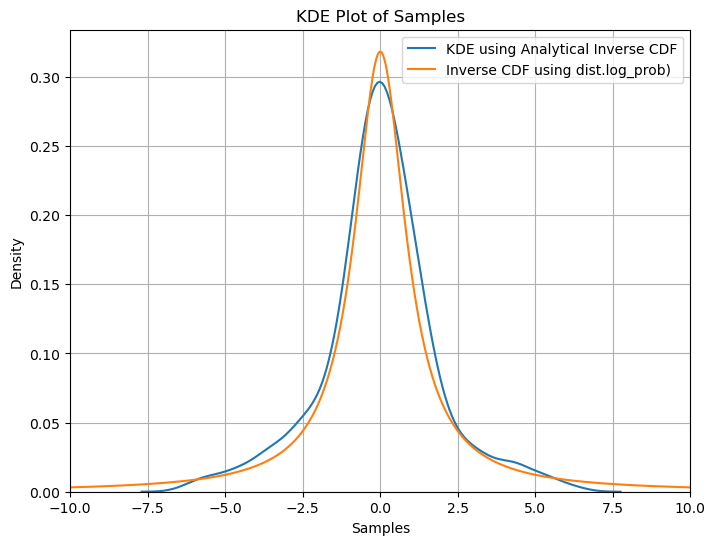

In [113]:
# plot kde plot of samples using seaborn
plt.figure(figsize=(8, 6))
sns.kdeplot(data=samples1.numpy(), label='KDE using Analytical Inverse CDF')
plt.plot(x_axis, samples2.numpy(), label='Inverse CDF using dist.log_prob)')
plt.xlim(-10, 10)
plt.xlabel('Samples')
plt.ylabel('Density')
plt.title('KDE Plot of Samples')
plt.legend()
plt.grid(True)
plt.show()


#### Q2. iii)

In [89]:
dist_cauchy = torch.distributions.cauchy.Cauchy(loc=x0, scale=gamma)
samples3 = dist_cauchy.icdf(y)

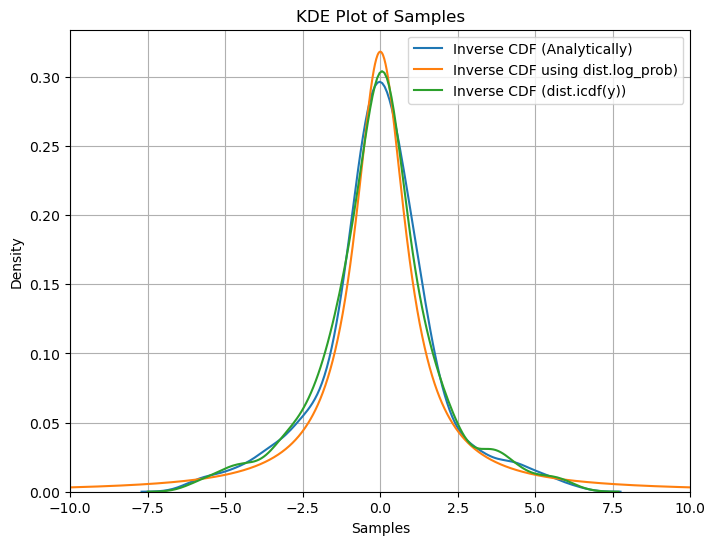

In [115]:
# plot kde plot of samples using seaborn
plt.figure(figsize=(8, 6))
sns.kdeplot(data=samples1.numpy(), label='Inverse CDF (Analytically)')
plt.plot(x_axis, samples2.numpy(), label='Inverse CDF using dist.log_prob)')
sns.kdeplot(data=samples3.numpy(), label='Inverse CDF (dist.icdf(y))')
plt.xlim(-10, 10)
plt.xlabel('Samples')
plt.ylabel('Density')
plt.title('KDE Plot of Samples')
plt.legend()
plt.grid(True)
plt.show()


##### Conclusions:
We observe that the 

# Q3

# Q4

In [2]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=100, noise=0.02, random_state=42)

In [3]:
import torch.nn as nn
model = nn.Sequential(
    nn.Linear(2, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
)

In [4]:
# what are the total number of parameters in the model?
total_params = sum(p.numel() for p in model.parameters())

In [5]:
total_params

33

In [ ]:
# Apply N(0, 1) prior on all the parameters of the neural network and find MAP estimate of parameters

